In [1]:
# First small project
# concentrates on the analysis of seasonal changes on stocks price of Amazon

In [2]:
# we want to explore the seasonality influences brought on stocks
# we explore amazon's stocks
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as reader

In [3]:
data = reader.DataReader('AMZN','yahoo','2000-01-01','2020-01-01') # we load the data for the past 20 years

In [4]:
# we want to see the percentage change of the price of the stock compared to yesterday
# first we convert the whole set 'Adj Close' to percentage change
# then, we group by them based on month and year

# after that, we take the average of the percentage change of each sub group
# it returns a dataframe
amzn_monthly_return = data['Adj Close'].pct_change().groupby([data['Adj Close'].index.year, data['Adj Close'].index.month]).mean()
pd.set_option('display.max_rows', None)
# the index is the specific month in a specific year in the past 20 years
print(amzn_monthly_return)

Date  Date
2000  1      -0.015036
      2       0.005429
      3      -0.000257
      4      -0.008013
      5      -0.004380
      6      -0.010695
      7      -0.007372
      8       0.014841
      9      -0.002842
      10      0.001752
      11     -0.016639
      12     -0.020320
2001  1       0.009077
      2      -0.025760
      3       0.002854
      4       0.026025
      5       0.003966
      6      -0.006911
      7      -0.003403
      8      -0.013731
      9      -0.025007
      10      0.009702
      11      0.027764
      12     -0.000801
2002  1       0.015722
      2       0.000827
      3       0.001718
      4       0.008278
      5       0.004564
      6      -0.004819
      7      -0.003472
      8       0.002076
      9       0.004133
      10      0.008861
      11      0.009977
      12     -0.009671
2003  1       0.007213
      2       0.000651
      3       0.008426
      4       0.005357
      5       0.010972
      6       0.000813
      7       0.007009


In [5]:
amzn_monthly_return_list = []
values = list(amzn_monthly_return)

# we use a list (dictionary) to track the seasonal change in price

for i in range(len(amzn_monthly_return)):
    # we append a pair
    amzn_monthly_return_list.append({'month':amzn_monthly_return.index[i][1], 'monthly_return':list(amzn_monthly_return)[i]})


amzn_monthly_return_list = pd.DataFrame(amzn_monthly_return_list, columns = ('month', 'monthly_return'))
print(amzn_monthly_return_list)

     month  monthly_return
0        1       -0.015036
1        2        0.005429
2        3       -0.000257
3        4       -0.008013
4        5       -0.004380
5        6       -0.010695
6        7       -0.007372
7        8        0.014841
8        9       -0.002842
9       10        0.001752
10      11       -0.016639
11      12       -0.020320
12       1        0.009077
13       2       -0.025760
14       3        0.002854
15       4        0.026025
16       5        0.003966
17       6       -0.006911
18       7       -0.003403
19       8       -0.013731
20       9       -0.025007
21      10        0.009702
22      11        0.027764
23      12       -0.000801
24       1        0.015722
25       2        0.000827
26       3        0.001718
27       4        0.008278
28       5        0.004564
29       6       -0.004819
30       7       -0.003472
31       8        0.002076
32       9        0.004133
33      10        0.008861
34      11        0.009977
35      12       -0.009671
3

[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), Text(6, 0, '6'), Text(7, 0, '7'), Text(8, 0, '8'), Text(9, 0, '9'), Text(10, 0, '10'), Text(11, 0, '11'), Text(12, 0, '12')]


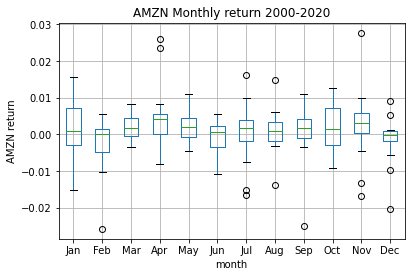

In [6]:
# after cleaning up the data, we want to visualize it
amzn_monthly_return_list.boxplot(column = 'monthly_return',by ='month') # by: columns in groupby function
# circle: outliers

# gca: get current axes
ax = plt.gca()
print(ax.get_xticklabels()) 
# the return value is like that:
# x-position, y-position, text
# we set new labels
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('AMZN return')
plt.suptitle("") # suptitle: the main title of the images
plt.title("AMZN Monthly return 2000-2020")
plt.show()

In [7]:
# we can observe that the highest return months are Jan and Oct
# and we want to check the stationary property of the time series for later technical analysis
# stationary: if the statistical properties don't change
# that is: constant mean and variance, and the covariance is independant of time
# so that we can find out the trend
# thus, we use to rolling window to check the stationary

In [8]:
def rolling_statistics(ts, title_text, y_text, window_size = 12):
    ts.plot(color = 'r',label = 'original', lw = 0.5)
    # the rolling will return a dataframe too
    # note: for time-window size, the min_window_size is 1
    ts.rolling(window_size).mean().plot(color ='b',label = 'rolling mean')
    ts.rolling(window_size).std().plot(color = 'black',label = 'rolling standard std')
    
    plt.legend(loc = 'best') # the title will locate at the upper left
    plt.ylabel(y_text)
    plt.title(title_text)
    plt.show()

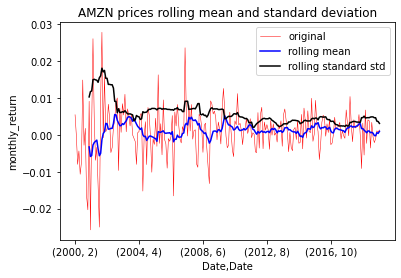

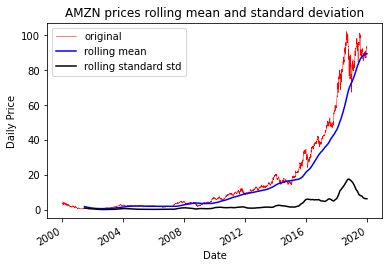

In [9]:
rolling_statistics(amzn_monthly_return[1:],"AMZN prices rolling mean and standard deviation", 'monthly_return')

rolling_statistics(data['Adj Close'],"AMZN prices rolling mean and standard deviation", 'Daily Price',365)

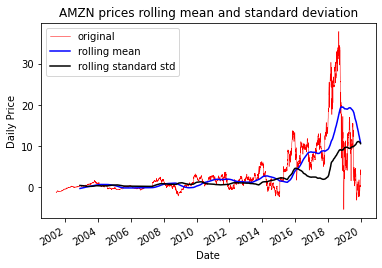

In [10]:
# from the graphs above, we can observe that there is a trend if we use daily price
# we can substract the moving average from the daily price
rolling_statistics(data['Adj Close'] - data['Adj Close'].rolling(365).mean(),"AMZN prices rolling mean and standard deviation", 'Daily Price',365)

In [11]:
# we check the stationary
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts):
    print("results from fickey-fuller test:") # this part I will revisit later
    
    # why we start at row 1: we need the data at t-1
    dftest = adfuller(ts[1:],autolag = 'AIC') # AIC:default part
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)

In [12]:
# we see that the p value is 0.998911 ---> we fail to reject the null hypothesis
test_stationarity(data['Adj Close'])

results from fickey-fuller test:
Test Statistic                    2.236144
p-value                           0.998911
#Lags Used                       32.000000
Number of Observations Used    4997.000000
dtype: float64


In [13]:
# the p value is much smaller than 0.05 ---> the series here is stationary
test_stationarity(amzn_monthly_return[1:])

results from fickey-fuller test:
Test Statistic                -9.613808e+00
p-value                        1.782442e-16
#Lags Used                     3.000000e+00
Number of Observations Used    2.340000e+02
dtype: float64


In [14]:
# we have found that the monthly return is stationary. we want to use it
# to forecast price.
# we apply auto-regression integrated moving average (ARIMA)
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

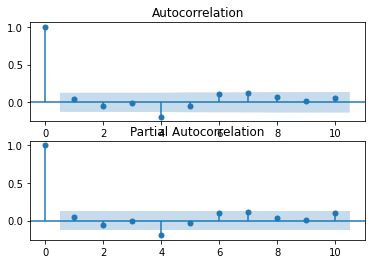

In [25]:
plt.figure()
plt.subplot(211)
plot_acf(amzn_monthly_return[1:], ax = plt.gca(),lags = 10)

plt.subplot(212)
plot_pacf(amzn_monthly_return[1:], ax = plt.gca(),lags = 10)
plt.show() # display the current image we are working on 

/Users/zhangkexin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/zhangkexin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/zhangkexin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


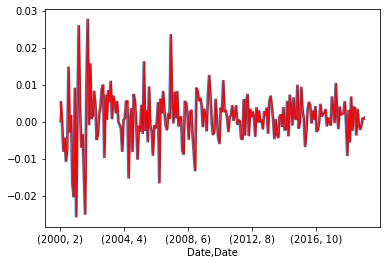

In [107]:
# based on the Box-Jenkins Method, we want to use the value of the last large flag before the flags are cut off
# from the two graphs, we see that both p and q are 0
# we use ARIMA now
from statsmodels.tsa.arima.model import ARIMA

# we use first-order differentiation, so d = 1
model = ARIMA(amzn_monthly_return[1:],order = (0,1,0)) # the order I will explore later

result = model.fit()

amzn_monthly_return[1:].plot()
result.fittedvalues.plot(color='red')
plt.show()

In [108]:
# we print out the summary to see more about our predictions
print(result.summary()) 

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  239
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 781.593
Date:                Tue, 02 Aug 2022   AIC                          -1561.186
Time:                        18:21:04   BIC                          -1557.714
Sample:                             0   HQIC                         -1559.787
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.215e-05   5.08e-06     16.179      0.000    7.22e-05    9.21e-05
Ljung-Box (L1) (Q):                  47.59   Jarque-Bera (JB):                59.89
Prob(Q):                              0.00   Pr

<AxesSubplot:xlabel='Date,Date'>

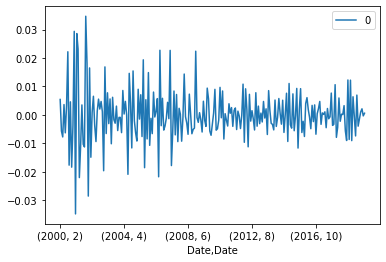

In [109]:
# we check the residuals
residuals = pd.DataFrame(result.resid)
residuals.plot()

/Users/zhangkexin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)


<AxesSubplot:xlabel='Date'>

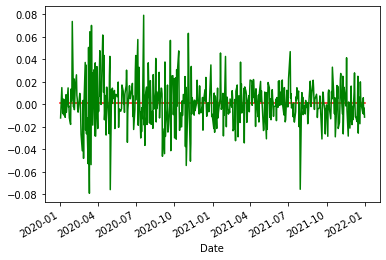

In [125]:
# we do a simple prediction starting from 2020-01-02 to 2021-12-31
prediction = result.forecast(steps = 505,alpha = 0.05)

# and compare it with the real data
data = reader.DataReader('AMZN','yahoo','2020-01-02','2021-12-31')['Adj Close']
ax1 = plt.gca()


prediction = prediction.set_axis(data.index)
print(prediction.index)
prediction.plot(ax = ax1,color = 'r')
data.pct_change().plot(ax =ax1, color = 'g')

# it seems that our prediction only captures the rolling mean of the return for the dates until now...

505


<AxesSubplot:xlabel='Date'>

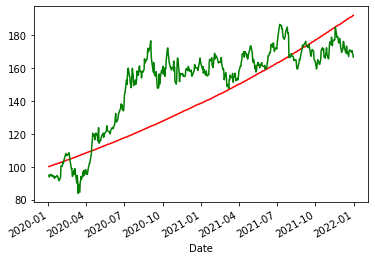

In [126]:
# or we turn our prdiction of rate of return back to price?
predicted_prices = prediction.add(1).cumprod().mul(100)
print(len(data))
ax1 = plt.gca()


predicted_prices = predicted_prices.set_axis(data.index)

predicted_prices.plot(ax = ax1,color = 'r')
data.plot(ax =ax1, color = 'g')

# from seeing the graph of the comparison of the stock prices, it seems that our prediction captures the d

In [131]:
# define s rmse function for seeing the model's performance
def rmse(actual, prediction):
    # check for the length
    if len(actual) != len(prediction):
        return "Invalid input."
    n = len(actual)
    ans = 0
    for i in range(n):
        ans += (actual[i] - prediction[i]) ** 2
    ans /= n
    ans = ans ** 0.5        
    return ans

In [132]:
rmse(data, predicted_prices)
# we see that the root mean square error is 19.18
# which is not satisfactory (definitely!) 
# but for my first project for now, it is good enough
# and I gonna go back to optimize it in the near future

19.18302942246366